# Statistical Analysis of Climate Data in Haiti (2010-2024)

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Load the dataset
df = pd.read_csv('../data/climat_haiti_2010_2024.csv')

# Display the first few rows of the dataset
df.head()

,date,annee,temp_max,temp_min,precipitation,humidite
0,2010-01-01,2010,28.5,19.3,0.0,69
1,2010-01-02,2010,28.4,21.0,0.9,71
2,2010-01-03,2010,26.7,19.2,5.0,79
3,2010-01-04,2010,25.7,20.5,1.7,83
4,2010-01-05,2010,26.6,19.0,0.6,77


In [7]:
# Check for missing values
df.isnull().sum()

date             0
annee            0
temp_max         0
temp_min         0
precipitation    0
humidite         0
dtype: int64

In [31]:
# Processing the data
df['temp_moy'] = (df['temp_max'] + df['temp_min']) / 2

In [9]:
df.head()

,date,annee,temp_max,temp_min,precipitation,humidite,temp_moy
0,2010-01-01,2010,28.5,19.3,0.0,69,23.90
1,2010-01-02,2010,28.4,21.0,0.9,71,24.70
2,2010-01-03,2010,26.7,19.2,5.0,79,22.95
3,2010-01-04,2010,25.7,20.5,1.7,83,23.10
4,2010-01-05,2010,26.6,19.0,0.6,77,22.80


In [18]:
# Building the linear regression model
X = df[['precipitation', 'humidite']]
y = df['temp_moy']

# adding a constant to the model for the intercept
X = sm.add_constant(X)

# Getting the model summary
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               temp_moy   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     361.2
Date:                Fri, 11 Jul 2025   Prob (F-statistic):          4.38e-148
Time:                        17:12:00   Log-Likelihood:                -10696.
No. Observations:                5479   AIC:                         2.140e+04
Df Residuals:                    5476   BIC:                         2.142e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            31.8725      0.213    149.493

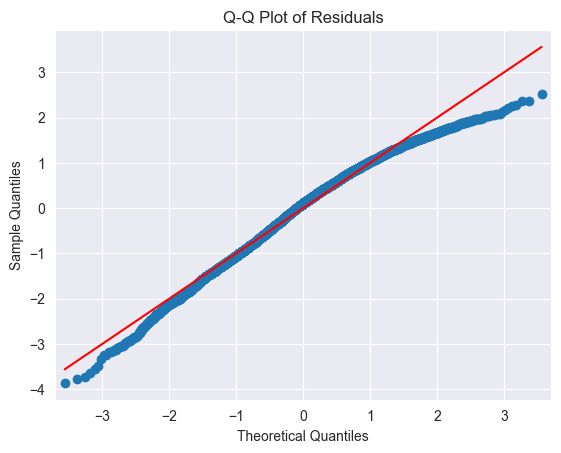

In [11]:
# Studying the residuals
residuals = model.resid

# Plotting the residuals
sm.qqplot(residuals, line='s', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

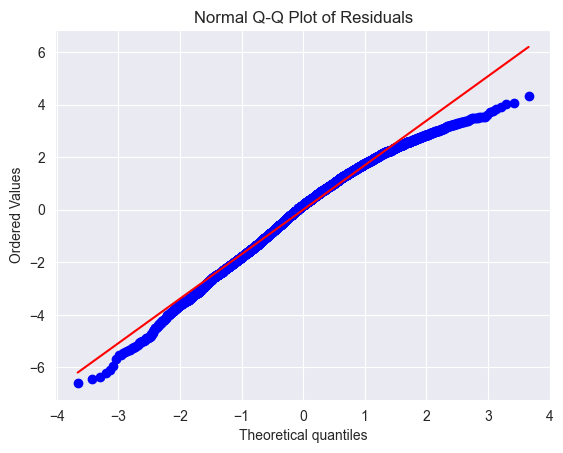

In [12]:
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Normal Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

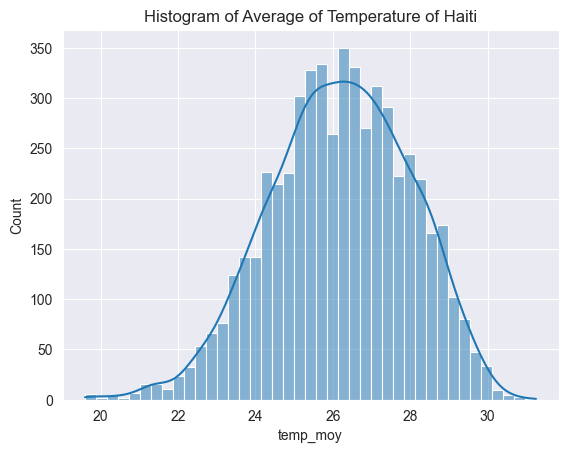

In [15]:
sns.histplot(df['temp_moy'], kde=True)
plt.title('Histogram of Average of Temperature of Haiti')
plt.show()

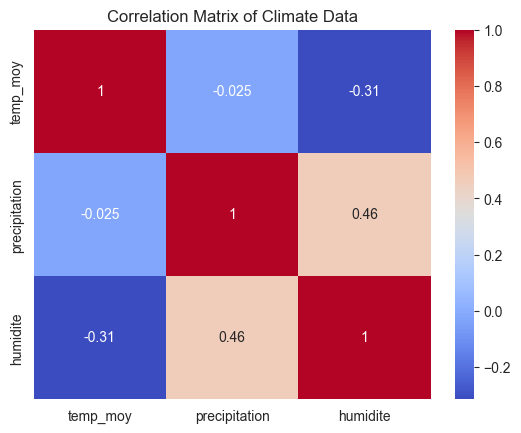

In [17]:
# correlation matrix
sns.heatmap(df[['temp_moy', 'precipitation', 'humidite']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Climate Data')
plt.show()

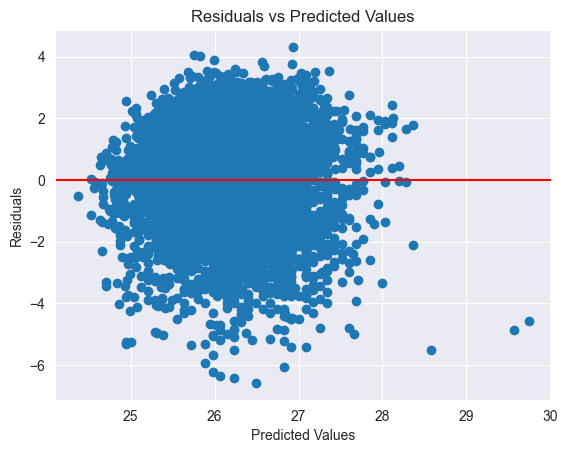

In [19]:
# Predicting the average temperature with the model
y_pred = model.predict(X)

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

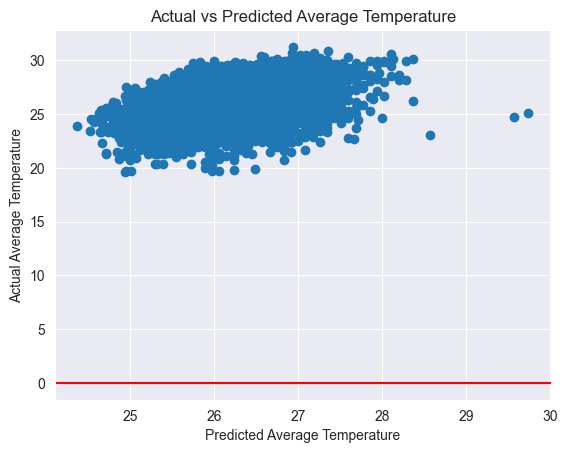

In [20]:
# Plotting the actual vs predicted values
plt.scatter(y_pred, df['temp_moy'])
plt.axhline(y=0, color='r')
plt.title('Actual vs Predicted Average Temperature')
plt.xlabel('Predicted Average Temperature')
plt.ylabel('Actual Average Temperature')
plt.grid(True)
plt.show()

In [23]:
# Multicollinearity check - VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

         feature        VIF
0          const  85.665652
1  precipitation   1.262692
2       humidite   1.262692


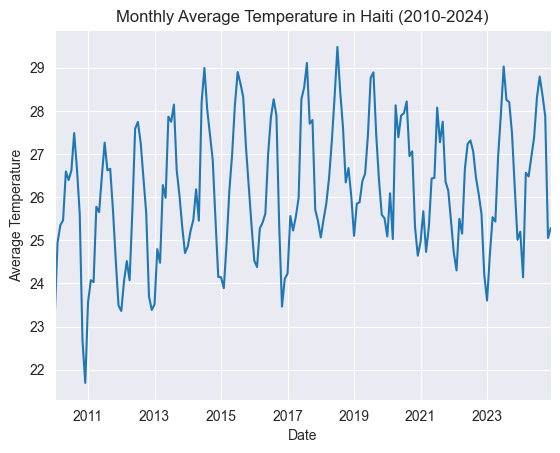

In [32]:
# Times series analysis
df['date'] = pd.to_datetime(df['date'])
df.set_index('date').resample('M')['temp_moy'].mean().plot()
plt.title('Monthly Average Temperature in Haiti (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

In [33]:
# Predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
# print('Coefficients:', dict(zip(X.columns, model.coef_))

R2 Score: 0.11584150233694479
Mean Squared Error: 2.8985121430563274
